In [0]:
#import all libraries
  from keras.models import Sequential
  from keras.layers import Convolution2D
  from keras.layers import MaxPooling2D
  from keras.layers import Flatten
  from keras.layers import Dense
  

In [0]:
#My Model


#initializing a CNN
classifier = Sequential()
#Convolution
classifier.add(Convolution2D(32,3,3, input_shape = (28, 28, 3), activation = 'relu' ))

#Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))
#Convolution
classifier.add(Convolution2D(32,3,3, input_shape = (28, 28, 3), activation = 'relu' ))

#Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))


#Flattening
classifier.add(Flatten())
#Full Connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

#Compiling CNN
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  


In [0]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen= ImageDataGenerator(rescale=1./255)
training_set= train_datagen.flow_from_directory(
    '/content/drive/My Drive/train/',
    target_size=(28,28),
    batch_size=64,
    class_mode='binary')
test_set= test_datagen.flow_from_directory(
    '/content/drive/My Drive/test/',
    target_size=(28,28),
    batch_size=64,
    class_mode='binary')

Found 49 images belonging to 11 classes.
Found 0 images belonging to 0 classes.


In [0]:
history = classifier.fit_generator(
      training_set,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=test_set,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)


Epoch 1/20
 - 13s - loss: -5.3949e+01 - acc: 0.1024
Epoch 2/20
 - 12s - loss: -5.7913e+01 - acc: 0.1020
Epoch 3/20
 - 12s - loss: -5.7913e+01 - acc: 0.1020
Epoch 4/20
 - 12s - loss: -5.7913e+01 - acc: 0.1020
Epoch 5/20
 - 12s - loss: -5.7913e+01 - acc: 0.1020
Epoch 6/20
 - 12s - loss: -5.7913e+01 - acc: 0.1020
Epoch 7/20
 - 12s - loss: -5.7913e+01 - acc: 0.1020
Epoch 8/20
 - 12s - loss: -5.7913e+01 - acc: 0.1020
Epoch 9/20
 - 12s - loss: -5.7913e+01 - acc: 0.1020
Epoch 10/20
 - 12s - loss: -5.7913e+01 - acc: 0.1020
Epoch 11/20
 - 12s - loss: -5.7913e+01 - acc: 0.1020
Epoch 12/20
 - 12s - loss: -5.7913e+01 - acc: 0.1020
Epoch 13/20
 - 12s - loss: -5.7913e+01 - acc: 0.1020
Epoch 14/20
 - 12s - loss: -5.7913e+01 - acc: 0.1020
Epoch 15/20
 - 12s - loss: -5.7913e+01 - acc: 0.1020
Epoch 16/20
 - 12s - loss: -5.7913e+01 - acc: 0.1020
Epoch 17/20
 - 12s - loss: -5.7913e+01 - acc: 0.1020
Epoch 18/20
 - 12s - loss: -5.7913e+01 - acc: 0.1020
Epoch 19/20
 - 12s - loss: -5.7913e+01 - acc: 0.1020
Ep

Text(0.5, 1.0, 'Training and validation loss')

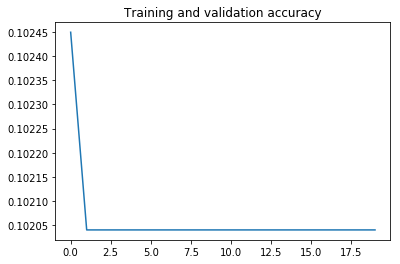

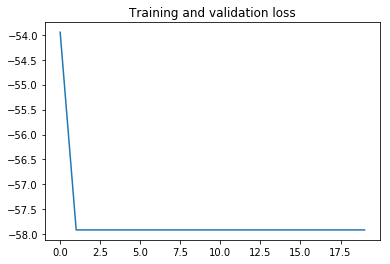

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
acc = history.history['acc']


# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.title('Training and validation loss')

In [0]:
#making a new prediction
import numpy as np
from keras.preprocessing.image import image

test_image = image.load_img(path = '/content/drive/My Drive/test/001.png', target_size=(28,28)) 
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'F': 4,
 'G': 5,
 'H': 6,
 'T': 7,
 'U': 8,
 'Y': 9,
 'Z': 10}

In [0]:
if result[0][0]==0:
  print("A")
elif result[0][0]==1:
  print("B")
elif result[0][0]==2:
  print("C")
elif result[0][0]==3:
  print("D")
elif result[0][0]==4:
  print("E")
elif result[0][0]==5:
  print("F")
elif result[0][0]==6:
  print("G")
elif result[0][0]==7:
  print("H")
elif result[0][0]==8:
  print("T")
elif result[0][0]==9:
  print("U")
elif result[0][0]==10:
  print("Y")
elif result[0][0]==11:
  print("Z")



B
